# Package import

In [949]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

# Binary logistic regression

In [950]:
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

**Ex. 0.**

In [951]:
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [952]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


**Ex. 1.**

In [953]:
X = data.values[:, :2].T
Y = data.values[:, 2:].T

theta = np.zeros((X.shape[0]+1, 1))

X = np.concatenate([np.ones([1, X.shape[1]]), X])

for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

**Ex. 2.**

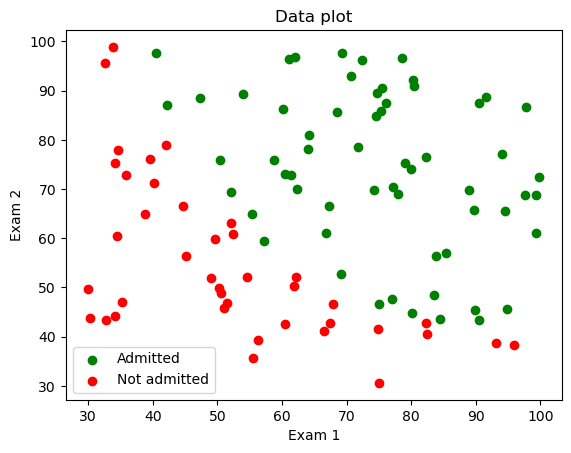

In [954]:
admitted = data[data['Admitted'] == 1]
not_admitted = data[data['Admitted'] == 0]

plt.scatter(admitted['Exam 1'], admitted['Exam 2'], color='green')
plt.scatter(not_admitted['Exam 1'], not_admitted['Exam 2'], color='red')
plt.title('Data plot')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.legend(['Admitted', 'Not admitted'])
plt.show()

**Ex. 3.**

In [955]:
def sig(t):
    return 1/(1 + np.exp(-t))

**Ex. 4.**

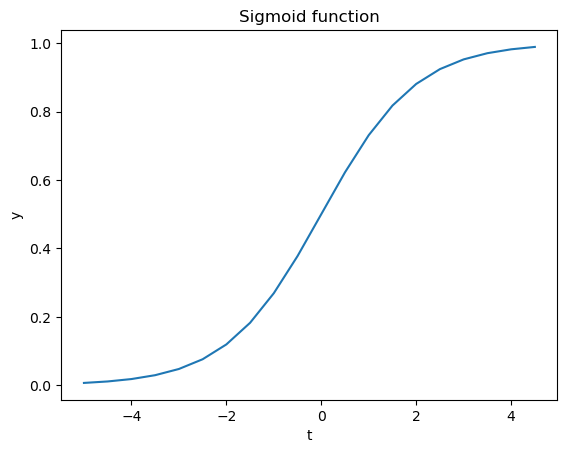

In [956]:
x = np.arange(-5, 5, 0.5)
y = sig(x)

plt.plot(x, y)
plt.title('Sigmoid function')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

**Ex. 5.**

In [957]:
def h(theta, X):
    return sig(theta.T@X)

def computeCost(theta, X, y):
    diff = -y*np.log(h(theta, X)) - (1 - y)*np.log(1 - h(theta, X))
    return diff.sum()/(X.shape[1])

In [958]:
theta = np.zeros((X.shape[0], 1))
computeCost(theta, X, Y)

0.6931471805599453

**Ex. 6.**

In [959]:
def simple_gradient(X, y, theta, alpha, it):
    cost = []
    for i in range(it):
        theta = theta - ((alpha / X.shape[1]) * (h(theta, X) - y) @ X.T).T
        cost.append(computeCost(theta, X, y))
    return theta, cost

In [960]:
alpha = 1
it = 150
theta, cost = simple_gradient(X, Y, theta, alpha, it)

In [961]:
cost[-1]

0.2064071430444978

In [962]:
theta

array([[1.41957362],
       [3.35941597],
       [3.11271333]])

**Ex. 7.**

In [963]:
Y_predicted = h(theta, X) > 0.5
all = 0
good_predictions = 0
for val, pred in zip(Y[0,:], Y_predicted[0,:]):
    all += 1
    if (val == 0 and pred == 0) or (val == 1 and pred == 1):
        good_predictions += 1

In [964]:
print('Accuracy of the algorithm:', 100*good_predictions/all, '%')

Accuracy of the algorithm: 89.0 %


**Ex. 8.**

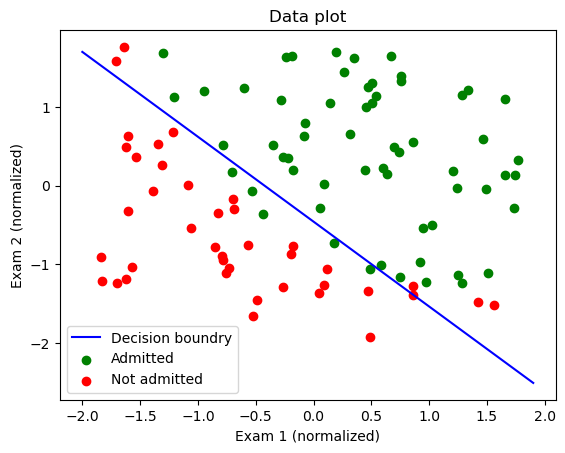

In [965]:
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.figure()
plt.plot(x1, x2, color='blue')
X1_1 = X[1, Y[0, :] == 1.0]
X2_1 = X[2, Y[0, :] == 1.0]
X1_0 = X[1, Y[0, :] == 0.0]
X2_0 = X[2, Y[0, :] == 0.0]
plt.scatter(X1_1, X2_1, color='green')
plt.scatter(X1_0, X2_0, color='red')
plt.title('Data plot')
plt.xlabel('Exam 1 (normalized)')
plt.ylabel('Exam 2 (normalized)')
plt.legend(['Decision boundry','Admitted', 'Not admitted'])
plt.show()

# Logistic regression - Python

In [966]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target
X, X_test, Y, Y_test = train_test_split(X, Y, train_size=0.7, random_state=0)

**Ex. 1.**

In [967]:
logreg = LogisticRegression(solver='lbfgs', C=100)

**Ex. 2.**

In [968]:
logreg.fit(X,Y)
Y_predicted = logreg.predict(X_test)

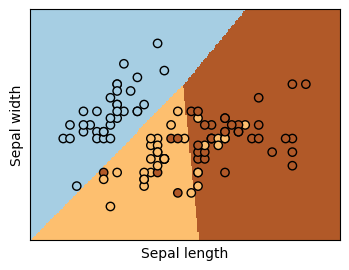

In [969]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

**Ex. 3.**

In [970]:
logreg.predict_proba(X_test)

array([[2.02169057e-04, 6.77793362e-01, 3.22004469e-01],
       [1.75536853e-08, 6.16219350e-01, 3.83780632e-01],
       [9.99986872e-01, 9.71921934e-06, 3.40854434e-06],
       [2.41755886e-12, 9.70886316e-02, 9.02911368e-01],
       [9.99669587e-01, 2.97351212e-04, 3.30620760e-05],
       [1.18533912e-04, 4.15059600e-01, 5.84821866e-01],
       [9.99895648e-01, 9.37160818e-05, 1.06361405e-05],
       [6.79512934e-08, 2.51707687e-01, 7.48292245e-01],
       [5.99072915e-10, 2.27075686e-01, 7.72924313e-01],
       [4.89386432e-06, 5.38303308e-01, 4.61691798e-01],
       [4.95088074e-07, 5.48485520e-01, 4.51513985e-01],
       [1.04851275e-05, 3.73014900e-01, 6.26974615e-01],
       [4.89386432e-06, 5.38303308e-01, 4.61691798e-01],
       [2.99981173e-08, 3.46571186e-01, 6.53428784e-01],
       [1.53838471e-05, 5.33195270e-01, 4.66789346e-01],
       [9.99989897e-01, 9.22508626e-06, 8.77666939e-07],
       [5.37299351e-05, 5.81710387e-01, 4.18235883e-01],
       [7.75109179e-04, 7.97738

**Ex. 4.**

In [971]:
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.76      0.72      0.74        18
           2       0.58      0.64      0.61        11

    accuracy                           0.80        45
   macro avg       0.78      0.79      0.78        45
weighted avg       0.80      0.80      0.80        45

